In [1]:
!pip install ipykernel

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)
sns.set_style("whitegrid")

In [2]:
## read the dataset
df = pd.read_csv("../data/walmart_raw.csv")

### Dataset Overview

In [3]:
## check the first five rows
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [4]:
## shape of the dataset
df.shape

(421570, 16)

In [5]:
## information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


### Data Types & Conversion

In [6]:
## describe the dataset
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [7]:
## identify the missing values

df.isnull().sum().sort_values(ascending=False)

MarkDown2       310322
MarkDown4       286603
MarkDown3       284479
MarkDown1       270889
MarkDown5       270138
Store                0
Date                 0
Dept                 0
Fuel_Price           0
Temperature          0
IsHoliday            0
Weekly_Sales         0
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [8]:
## precentage wise
(df.isnull().mean()*100).sort_values(ascending=False)

MarkDown2       73.611025
MarkDown4       67.984676
MarkDown3       67.480845
MarkDown1       64.257181
MarkDown5       64.079038
Store            0.000000
Date             0.000000
Dept             0.000000
Fuel_Price       0.000000
Temperature      0.000000
IsHoliday        0.000000
Weekly_Sales     0.000000
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

#### Markdown 1-5 -> many missing values 

In [9]:
## done the feature engineering

df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [10]:
## drop the Date column
df.drop(columns=["Date"],axis=1,inplace=True)

In [11]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
1,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2,12
2,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,19
3,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2,26
4,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3,5


### Target Variable Analysis (Weekly_Sales)

In [12]:
## Analysis Target variable

df["Weekly_Sales"].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

#### there are some outliers thats why mean not approximatly equal to the median value

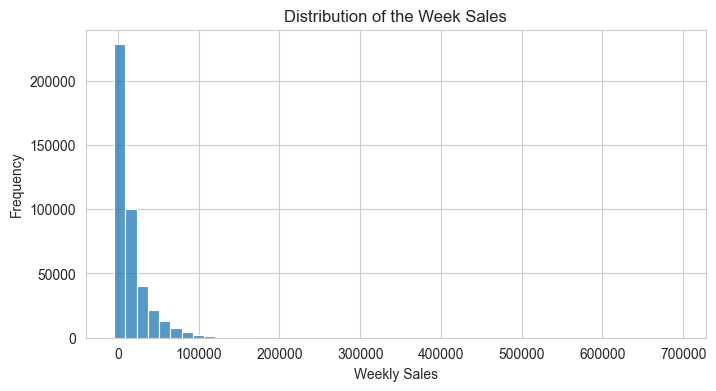

In [13]:
## check the skewness of the target column
plt.figure(figsize=(8,4))
sns.histplot(df["Weekly_Sales"],bins=50)
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.title("Distribution of the Week Sales")
plt.show()

#### find -> there is right skew in this target column

In [14]:
### apply the log transform to the target column

target_column = np.log1p(df["Weekly_Sales"])

d:\Retail-Sales-Forecasting\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\Retail-Sales-Forecasting\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


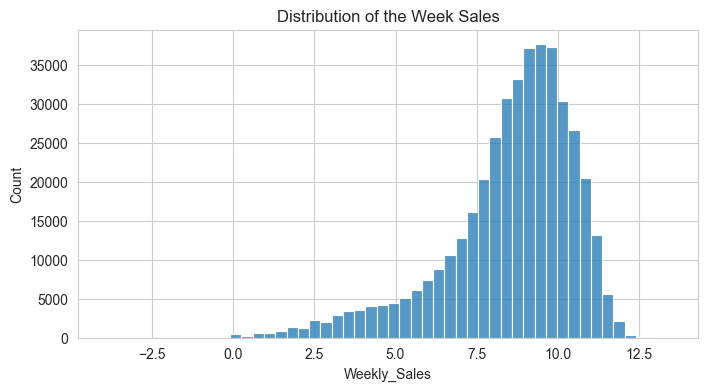

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(target_column,bins=50)
plt.title("Distribution of the Week Sales")
plt.show()

# Store Type

In [18]:
## sales average by store
df.groupby("Type")["Weekly_Sales"].mean()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

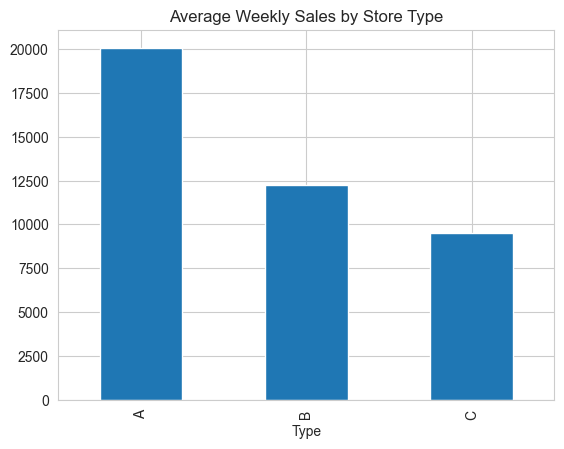

In [19]:
df.groupby("Type")["Weekly_Sales"].mean().plot(kind="bar")
plt.title("Average Weekly Sales by Store Type")
plt.show()

#### -> Type A stores generate the highest average sales

# Holiday vs Non-Holiday Sales

In [23]:
df.groupby("IsHoliday")["Weekly_Sales"].mean()

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

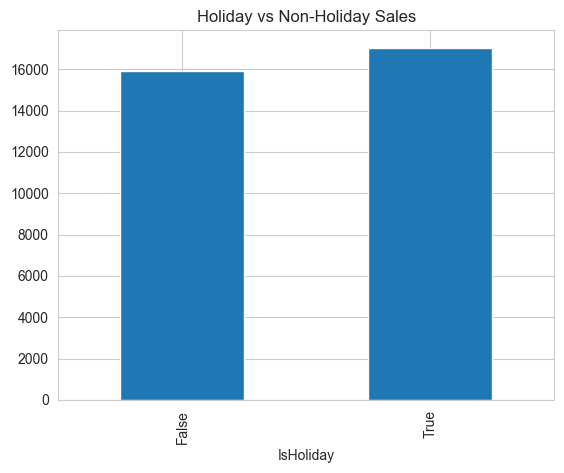

In [24]:
df.groupby("IsHoliday")["Weekly_Sales"].mean().plot(kind="bar")
plt.title("Holiday vs Non-Holiday Sales")
plt.show()

### -> Holiday weeks show significantly higher sales

In [ ]:
## store level analysis
store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

In [22]:
store_sales

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

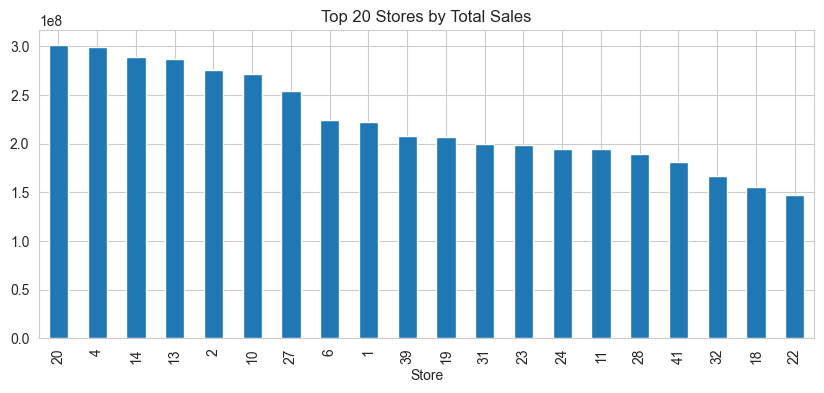

In [34]:
plt.figure(figsize=(10,4))
store_sales.head(20).plot(kind="bar")
plt.title("Top 20 Stores by Total Sales")
plt.show()

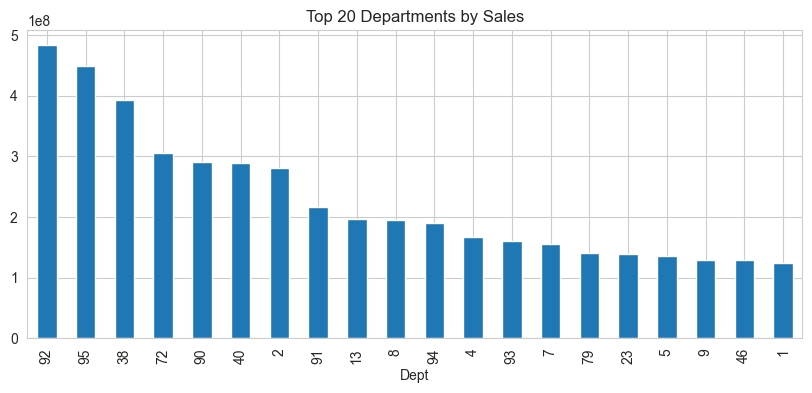

In [35]:
dept_sales = df.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,4))
dept_sales.head(20).plot(kind="bar")
plt.title("Top 20 Departments by Sales")
plt.show()

In [38]:
holiday_sales = df.groupby("IsHoliday")["Weekly_Sales"].mean()
holiday_sales

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

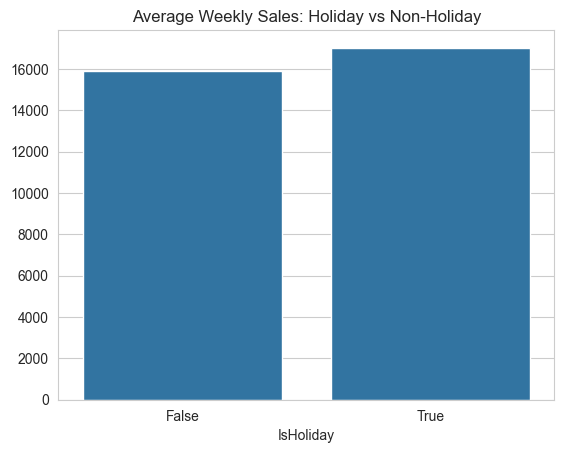

In [39]:
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.show()

#### Holidays significantly boost sales -> critical feature

# Correlation Analysis

In [ ]:


numerical_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(exclude=['int64','float64']).columns

In [44]:
numerical_cols

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'],
      dtype='object')

In [46]:
categorical_cols

Index(['IsHoliday', 'Type', 'Year', 'Month', 'Day'], dtype='object')

In [ ]:
## check the corr
df[numerical_cols].corr()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.024004,-0.085195,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881
Dept,0.024004,1.000000,0.148032,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966
Weekly_Sales,-0.085195,0.148032,1.000000,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828
Temperature,-0.050097,0.004437,-0.002312,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313
Fuel_Price,0.065290,0.003572,-0.000120,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361
MarkDown1,-0.119588,-0.002426,0.085251,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673
MarkDown2,-0.035173,0.000290,0.024130,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827
MarkDown3,-0.031556,0.001784,0.060385,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913
MarkDown4,-0.009941,0.004257,0.045414,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196
MarkDown5,-0.026634,0.000109,0.090362,-0.017544,-0.128065,0.160257,-0.007440,-0.026467,0.107792,1.000000,0.060630,-0.003843,0.304575


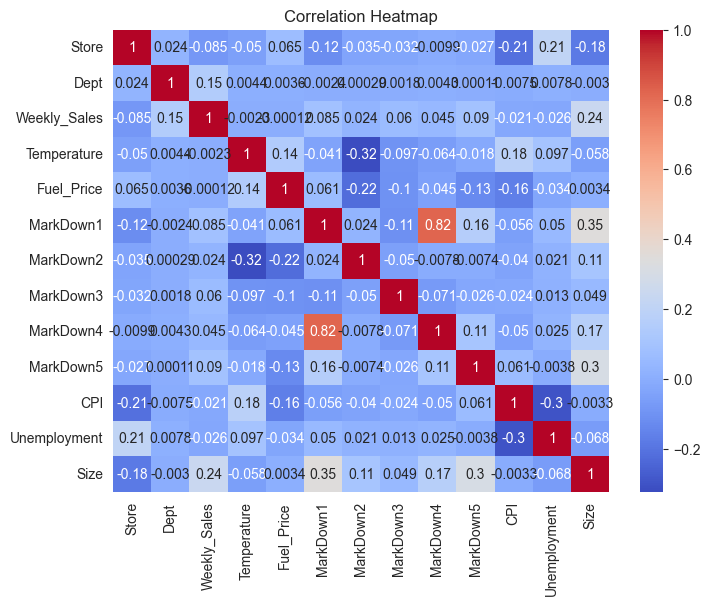

In [49]:
## using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Outlier Detection

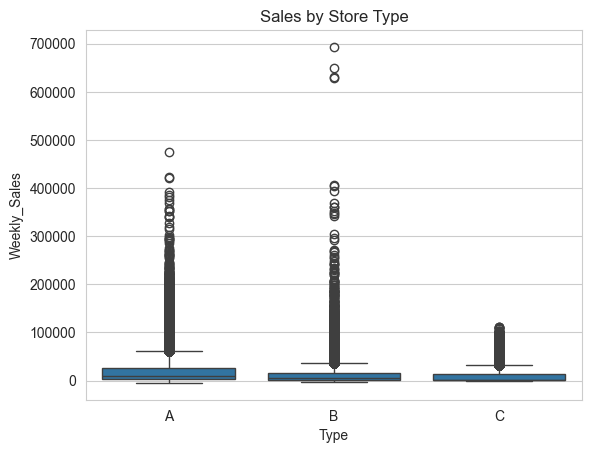

In [27]:
sns.boxplot(x="Type", y="Weekly_Sales", data=df)
plt.title("Sales by Store Type")
plt.show()

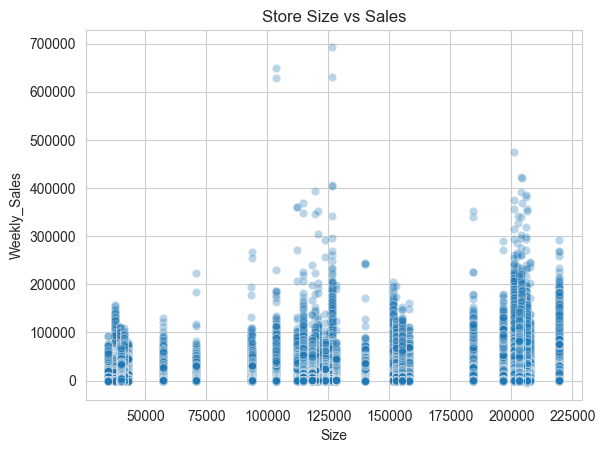

In [51]:
sns.scatterplot(x="Size", y="Weekly_Sales", data=df, alpha=0.3)
plt.title("Store Size vs Sales")
plt.show()

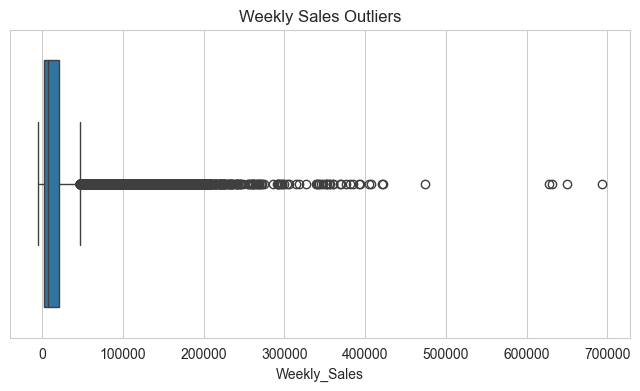

In [52]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Weekly_Sales"])
plt.title("Weekly Sales Outliers")
plt.show()

## Key Insights 

Weekly sales are highly skewed

Holidays strongly impact sales

Store and department heterogeneity is high

Markdowns influence sales but have missing values

Time features are critical

Tree-based models likely outperform linear ones

EDA Decisions for Modeling

Fill MarkDown missing values with 0

Use time-based features (Year, Month, Week)

Use log transformation on target (optional)

Keep outliers